C:\Users\SHIVAM\AppData\Local\Temp/ipykernel_27912/924879499.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\SHIVAM\AppData\Local\Temp/ipykernel_27912/924879499.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
C:\Users\SHIVAM\anaconda3\lib\site-packages\dash\resources.py:63: UserWarning: You have set your config to `serve_locally=True` but A local version of https://codepen.io/chriddyp/pen/bWLwgP.css is not available.
If you added this file with `app.scripts.append_script` or `app.css.append_css`, use `external_scripts` or `external_stylesheets` instead.
See https://dash.plotly.com/external-resources
  warnings.warn(
127.0.0.1 - - [02/Feb/2022 20:16:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Feb/2022 20:16:38] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_0_0m1639582379.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Feb/2022 20:16:38] "GET /_dash-component-suites/dash/deps/react@16.v2_0_0m1639582379.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Feb/2022 20:16:38] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_0_0m1639582379.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Feb/2022 20:16:38] "GET /_dash-component-suites/

xxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxx


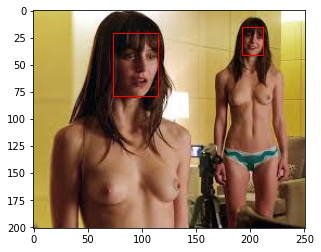

127.0.0.1 - - [02/Feb/2022 20:17:05] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [02/Feb/2022 20:17:05] "GET /assets/test1.jpg HTTP/1.1" 200 -


IMAGE SHAPE: (201, 251, 3)


In [1]:
import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
#import dash_table_experiments as dt                                                                                                                                                           
from PIL import Image
import datetime
import json
import pandas as pd
import plotly
import io
import numpy as np
from base64 import decodestring
import cv2
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
import base64
import plotly.express as px
# from IPython.display import Image




app = dash.Dash()

app.scripts.config.serve_locally = True

app.layout = html.Div([
    dcc.Upload(
        id='upload-image',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select Files')
        ]),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        # Allow multiple files to be uploaded                                                                                                                                                  
        multiple=True
    ),
    html.Div(id='output-image-upload'),
#     html.Img(id = 'output-detected-image'),
])


def parse_contents(contents):
    return html.Div([

        # HTML images accept base64 encoded strings in the same format                                                                                                                         
        # that is supplied by the upload                                                                                                                                                       
        html.Img(src=contents),
        html.Hr(),
        html.Div('Raw Content'),
        html.Pre(contents[:100] + '...', style={
            'whiteSpace': 'pre-wrap',
            'wordBreak': 'break-all'
        })
    ])


def toRGB(image):
    return cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)

# draw an image with detected objects
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    fig = pyplot.show()
    return fig

@app.callback(Output('output-image-upload', 'children'),
              [Input('upload-image', 'contents')])

def update_output(contents):
    print("xxxxxxxxxxxxxxxxxxxx")
    if not contents:
        return

    for i, image_str in enumerate(contents):
#         print(contents)
        image = image_str.split(',')[1]
#         data = decodestring(image.encode('ascii'))
        imgdata = base64.b64decode(image)
        data = Image.open(io.BytesIO(imgdata))
        data = toRGB(data)
        
        save_img = cv2.imwrite("assets/test1.jpg", np.array(data))
        data =pyplot.imread("assets/test1.jpg")
        
        detector = MTCNN()
        faces = detector.detect_faces(data)
        filename = "assets/test1.jpg"
        detected_img = draw_image_with_boxes(filename, faces)
        
        print("IMAGE SHAPE:", np.shape(data))
    


#     children = [parse_contents(i) for i in contents]
#     print(children)
#     opt = base64.b64encode(detected_img)
#     return children
    return  html.Img(src=app.get_asset_url('test1.jpg')) 
#     return html.Div([
#         html.Img(src=detected_img),
#         ])

# @app.callback(Output('output-detected-image','children'),
#             Input('upload-image','contents'))

# def display_output(contents):
#     return detected_img


app.css.append_css({
    'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'
})

if __name__ == '__main__':
    app.run_server(debug=False)

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html

import flask
import glob
import os

image_directory = 'C:/Users/SHIVAM/OneDrive/Pictures/'
list_of_images = [os.path.basename(x) for x in glob.glob('{}*.jpg'.format(image_directory))]
static_image_route = '/static/'

app = dash.Dash()

app.layout = html.Div([
    dcc.Dropdown(
        id='image-dropdown',
        options=[{'label': i, 'value': i} for i in list_of_images],
        value=list_of_images[0]
    ),
    html.Img(id='image')
])

@app.callback(
    dash.dependencies.Output('image', 'src'),
    [dash.dependencies.Input('image-dropdown', 'value')])

def update_image_src(value):
    return static_image_route + value

# Add a static image route that serves images from desktop
# Be *very* careful here - you don't want to serve arbitrary files
# from your computer or server
@app.server.route('{}<image_path>.jpg'.format(static_image_route))
def serve_image(image_path):
    image_name = '{}.jpg'.format(image_path)
    if image_name not in list_of_images:
        raise Exception('"{}" is excluded from the allowed static files'.format(image_path))
    return flask.send_from_directory(image_directory, image_name)

if __name__ == '__main__':
    app.run_server(debug=False)